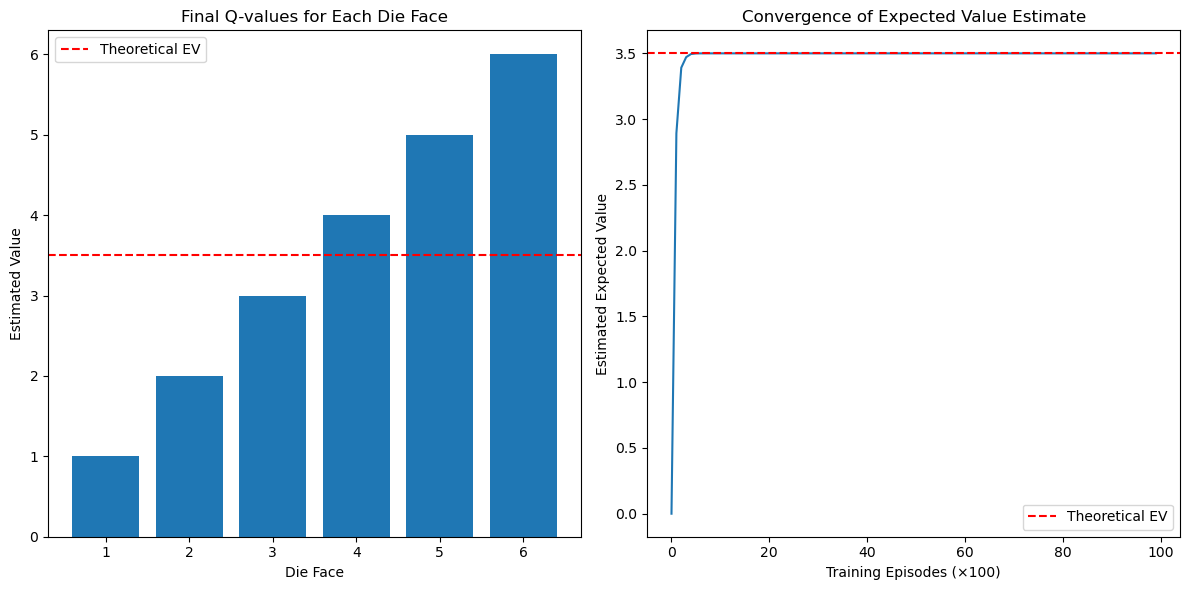


Final Q-values for each face: [1. 2. 3. 4. 5. 6.]
Final expected value estimate: 3.499999999999998
Theoretical expected value: 3.5


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Initialize Q-learning parameters
num_faces = 6  # Number of faces on a die
alpha = 0.1    # Learning rate
gamma = 0.9    # Discount factor
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of training episodes

# Initialize Q-table with zeros
q_table = np.zeros(num_faces)

# Train Q-learning agent
expected_values = []
for episode in range(num_episodes):
    # Choose random die face (state)
    current_state = np.random.randint(0, num_faces)
    
    # Get current estimate of expected value
    if episode % 100 == 0:  # Record every 100 episodes
        expected_values.append(np.mean(q_table))
    
    # Take action (observe current state)
    reward = current_state + 1  # Die faces are 1-6
    
    # Q-learning update
    # Since this is a single-step problem, next_state_value = 0
    q_table[current_state] += alpha * (reward - q_table[current_state])

# Create visualization of convergence
plt.figure(figsize=(12, 6))

# Plot Q-values for each face
plt.subplot(1, 2, 1)
plt.bar(range(1, num_faces + 1), q_table)
plt.axhline(y=3.5, color='r', linestyle='--', label='Theoretical EV')
plt.xlabel('Die Face')
plt.ylabel('Estimated Value')
plt.title('Final Q-values for Each Die Face')
plt.legend()

# Plot convergence of expected value
plt.subplot(1, 2, 2)
plt.plot(expected_values)
plt.axhline(y=3.5, color='r', linestyle='--', label='Theoretical EV')
plt.xlabel('Training Episodes (×100)')
plt.ylabel('Estimated Expected Value')
plt.title('Convergence of Expected Value Estimate')
plt.legend()

plt.tight_layout()
plt.show()

# Print final results
print("\nFinal Q-values for each face:", q_table)
print("Final expected value estimate:", np.mean(q_table))
print("Theoretical expected value:", 3.5)